In [1]:
import numpy
from matplotlib import pyplot as plt
import math

Implementation of the _standard map_: 
$$ \begin{align*} \phi_{n+1} &= (\phi_n + J_{n+1})\mod 2\pi \\
J_{n+1} &= \epsilon \sin \phi_n + J_n \end{align*}$$

In [2]:
def stdmap(Jphi, epsilon):
    nJ = epsilon*numpy.sin(Jphi[:,0]) + Jphi[:,1]
    return numpy.stack([(Jphi[:,0] + nJ + numpy.pi) % (2*numpy.pi) - numpy.pi, nJ], axis=1)

Make a mesh grid and see what happens to the points under iteration

In [3]:
XY = numpy.mgrid[-math.pi:math.pi:math.pi/10, -3.1:3.1:math.pi/10].reshape(2,-1).T

In [107]:
arrays = []
EPSILON = 0.5
N = 200
xy = XY
for i in range(N):
    xy = stdmap(xy, EPSILON)
    arrays.append(xy)
arrays=numpy.concatenate(arrays)

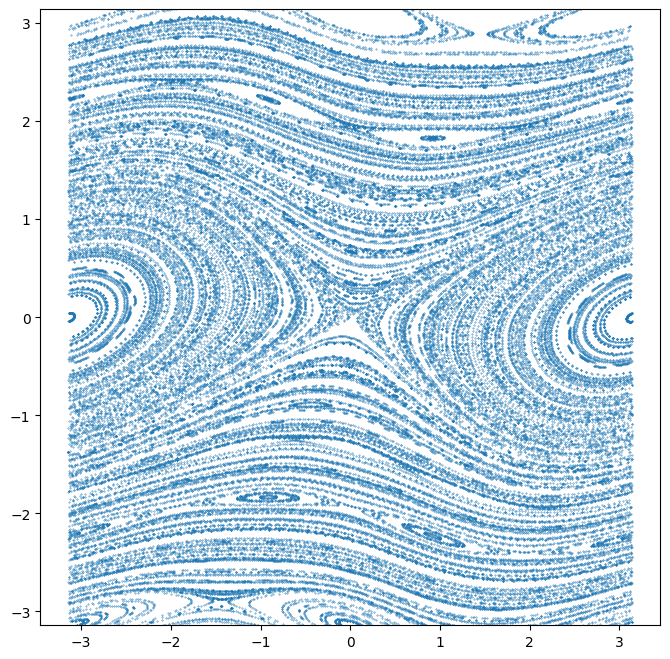

In [108]:
plt.figure(figsize=(8,8))
plt.scatter(arrays[:,0], arrays[:,1], s=0.1)
plt.ylim([-math.pi,math.pi])
plt.show()

In [70]:
def stdmap_nowrap(Jphi, epsilon):
    nJ = epsilon*numpy.sin(Jphi[:,0]) + Jphi[:,1]
    return numpy.stack([Jphi[:,0] + nJ, nJ], axis=1)

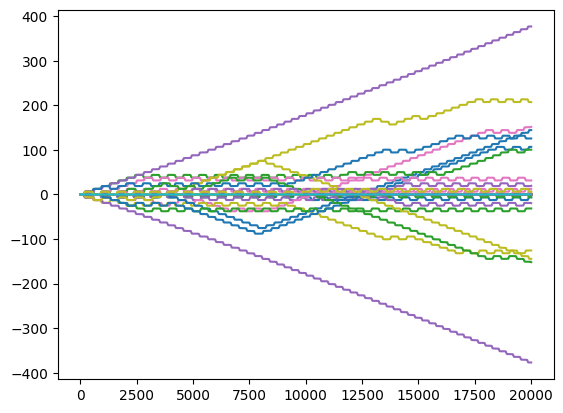

In [102]:
N=20000
EPSILON=0.01
for phi0 in numpy.linspace(-0.0000001,0.0000001, 20):
    pos = numpy.array([[phi0, 0.]])
    res = [pos]
    for i in range(N):
        pos = stdmap_nowrap(pos, EPSILON)
        res.append(pos)
    plt.plot(numpy.array(res)[:,0])
plt.show()